### Solutions for exercises involving computation from 'All of Statistics' by Larry Wasserman

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pandas.compat import StringIO
from scipy.stats import norm

### Chapter 3 - Random Variables

#### 13b.  X ~ N(0,1) and Y = exp(X) Generate a vector x consisting of 10000 random standard normals and let y = exp(x). Draw a histogram for y

In [3]:
x = np.random.normal(0, 1, 10000)
y = np.exp(x)

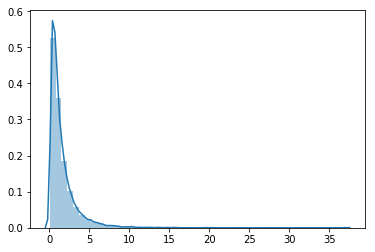

In [4]:
sns.distplot(y)

#### 15. Let U ~ Uniform(0,1) and X = F-inv (U)  then show that X ~ F. Now write a program that takes Uniform random variables and generates random variables form an exponential distribution

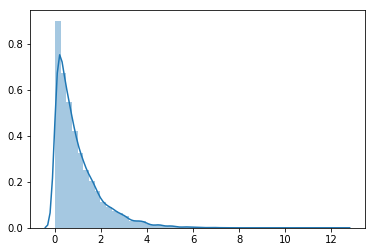

In [5]:
u = np.random.uniform(0,1, 10000)
i = np.ones_like(u)
# let beta =1 for the exponential distribution
# F-inv of exponential with beta=1 is -ln(1-u)
x = -np.log(i-u)
sns.distplot(x)

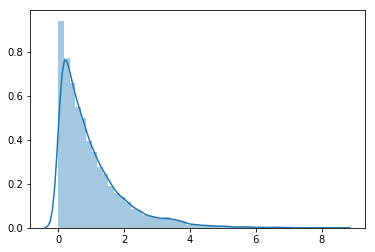

In [6]:
y = np.random.exponential(1, 10000)
sns.distplot(y)

### Chapter 4 - Expectation

#### 9. let X1, X2, ..., Xn ~ N(0,1); plot sample mean against n for n = 1, 2, ..., 10000. Repeat for  X1, X2, ..., Xn ~ Cauchy

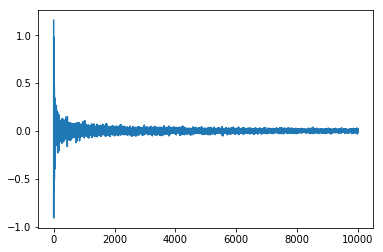

In [7]:
sample_means_normal = []
for n in range(1, 10001):
    x = np.random.normal(0,1,n)
    sample_means_normal.append(np.mean(x))
sns.lineplot(range(1,10001), sample_means_normal)

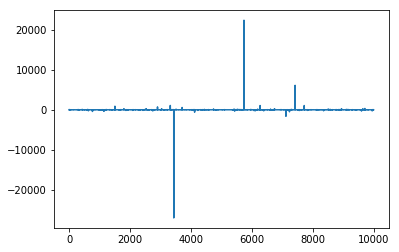

In [8]:
sample_means_cauchy = []
for n in range(1, 10001):
    x = np.random.standard_cauchy(n)
    sample_means_cauchy.append(np.mean(x))
sns.lineplot(range(1,10001), sample_means_cauchy)

#### 11. Y1, Y2,..., Yn are independent random variables. P(Yi = 1) = P(Yi = -1) = 1/2. Xn = sum(Yi). Think of Yi = 1 as stock price increased by 1 dollar and Yi = -1 as stock price decreased by 1 dollar. Xn is the value of the stock on day n
#### Simulate Xn and plot Xn vs n for n=1, 2, ..., 10000. Repeat the simulation 4 times

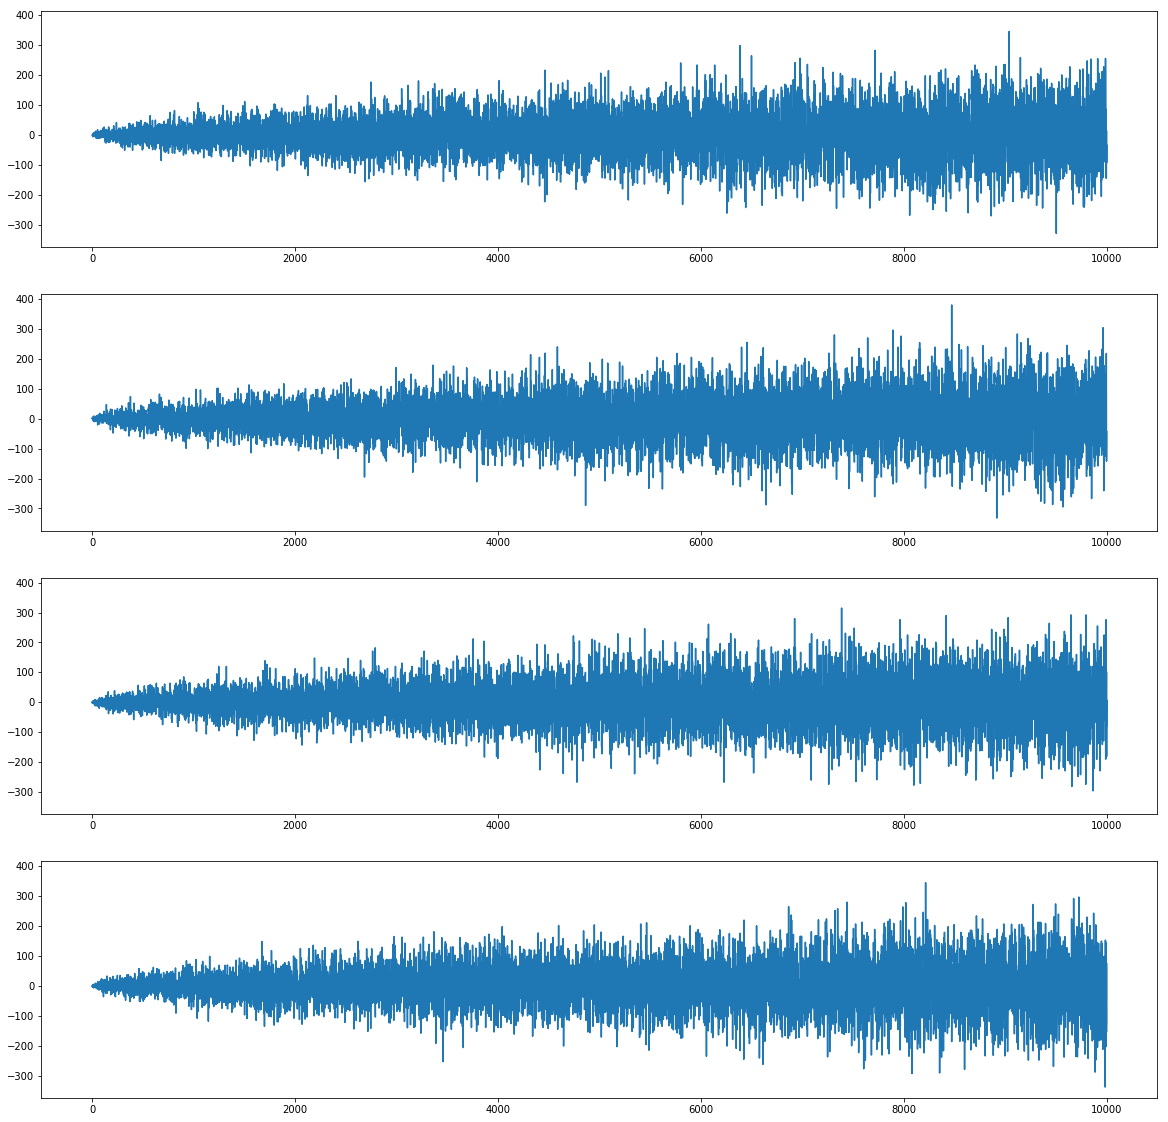

In [9]:
num_sims = 4
fig, axes = plt.subplots(num_sims, sharey=True,figsize=(20, 20))
for sims in range(num_sims):
    stock_prices = []
    for n in range(1, 10001):
        y = np.random.choice(a=[-1,1],size=n, p=[.5,.5])
        x = np.sum(y)
        stock_prices.append(x)
    sns.lineplot(range(1,10001), stock_prices, ax=axes[sims])

#### 19.  X1, X2,..., Xn are IID random variables with uniform(0,1) distribution. 
#### Xn = sum(Xi) / n
#### Simulate Xn for n=1, 5, 25, 100. Compute E(Xn) and V(Xn)

In [10]:
#sample_means=[]
for n in [1,5,25,100]:
    x = np.random.uniform(0,1,n)
    #xn = np.sum(x)/n
    exp_val_xn = np.mean(x)
    var_xn = np.var(x)/n
    print('n {} expected value {} variance {}'.format(n, exp_val_xn, var_xn))
#xn = np.array(sample_means)

n 1 expected value 0.019624685297264133 variance 0.0
n 5 expected value 0.4864277665007165 variance 0.022108359499448442
n 25 expected value 0.5736604034195782 variance 0.0032480355854047115
n 100 expected value 0.5155650642611814 variance 0.000850655213159344


### Chapter 5 - Equalities

#### 4b.  X1, X2, ..., Xn ~ Bernoulli(p) alpha=0.05, p=0.4, p_hat = mean(X), Cn=(p_hat-epsilon, p_hat+epsilon)
#### simulate 1000 times and find coverage = ratio of number of times p is in Cn to the total number of simulations
#### repeat for n=1,..,10000. plot coverage vs n

In [11]:
p=0.4
alpha=0.05
coverages = []
for n in tqdm(range(1,10001)):
    epsilon = np.sqrt(np.log(2/alpha)/(2*n))
    coverage = 0
    for sim_number in range(100):
        x = np.random.choice([1,0],p=[0.4,0.6],size=n)
        p_hat = np.mean(x)
        if p >= p_hat - epsilon and p <= p_hat + epsilon:
            coverage += 1
    coverage = coverage / 100
    coverages.append(coverage)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:47<00:00, 59.66it/s]


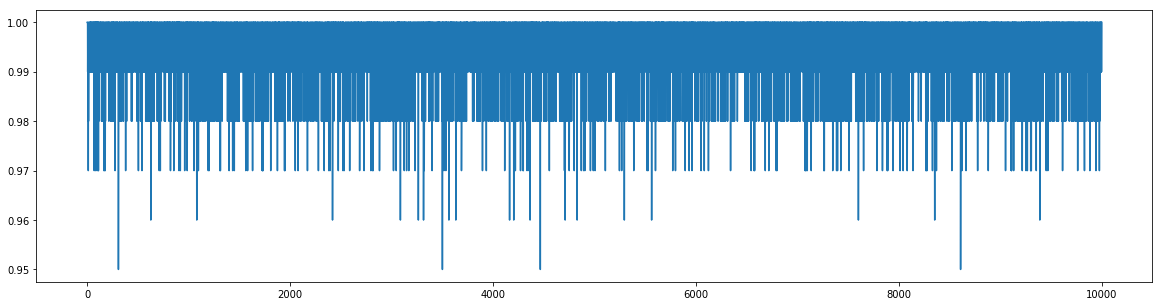

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(range(1,10001), coverages, ax=ax)

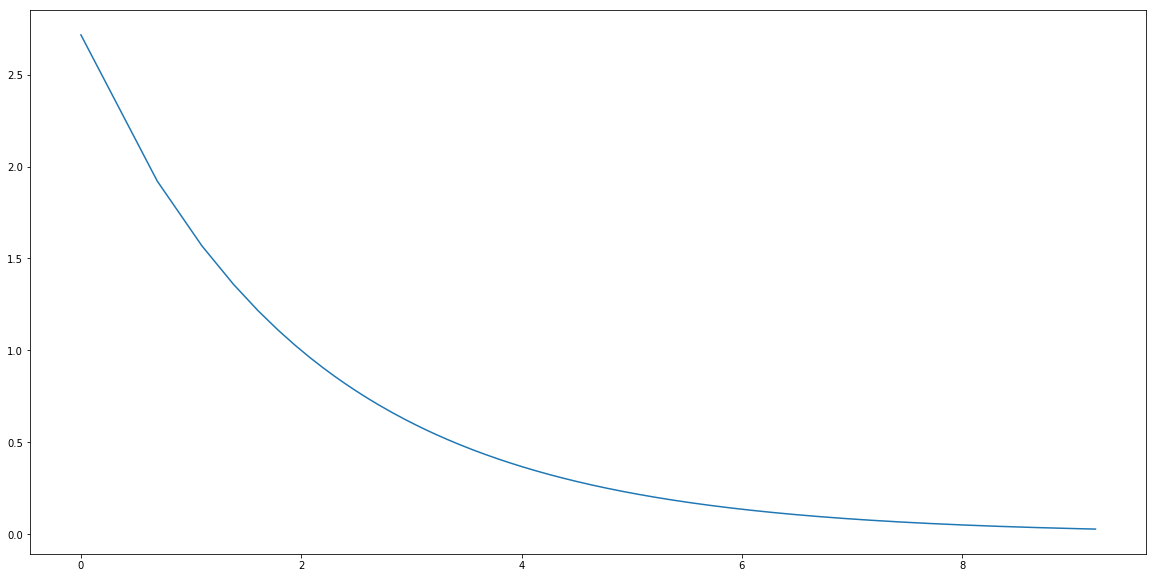

In [13]:
intervals = [2*np.sqrt(np.log(2/alpha)/(2*n)) for n in range(1,10001)]
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(np.log(range(1,10001)), intervals, ax=ax)

### Chapter 8 - Estimating CDF and Statistical Functions

#### 3. Generate 100 observations from a N(0,1) distribution. Compute a 95 per cent confidence band for the cdf F . Repeat this 1000 times and see how often the confidence band contains the true distribution function. Repeat using data from a Cauchy distribution.

(Page 126). 

In [14]:
from math import log
from scipy.stats import norm

n = 100
alpha = 1-0.95

def F_hat(n, x, X):
    sum_X = 0.0
    for X_i in X:
        if X_i <= x:
            sum_X = sum_X + 1
    return (sum_X / n)

epsilon = abs(np.sqrt(1/(2*n)*log(2/alpha)))

def lower_bound(n, x, X, epsilon):
    return max(F_hat(n,x, X)-epsilon, 0)

def upper_bound(n, x, X, epsilon):
    return min(F_hat(n,x, X)+epsilon, 1)

def simulate_conf_band(dist='normal', num_sims = 100):
    fig, ax = plt.subplots(figsize=(20, 10))
    for sim in range(num_sims):
        # generate random variables
        if dist == 'cauchy':
            X = np.random.standard_cauchy(n)
        else:
            X = np.random.normal(0,1,n)
            
        F_hat_lb = []
        F_hat_ub = []
        F_vals = []
        for x in range(-5, 6, 1):
            F_hat_lb.append(lower_bound(n, x, X, epsilon))
            F_hat_ub.append(upper_bound(n, x, X, epsilon))
            F_vals.append(norm.cdf(x))    

        sns.lineplot(range(-5, 6, 1), F_hat_ub, ax=ax, dashes=True, color='red')
        sns.lineplot(range(-5, 6, 1), F_hat_lb, ax=ax, dashes=True, color='blue')
        sns.lineplot(range(-5, 6, 1), F_vals, ax=ax, color='black')

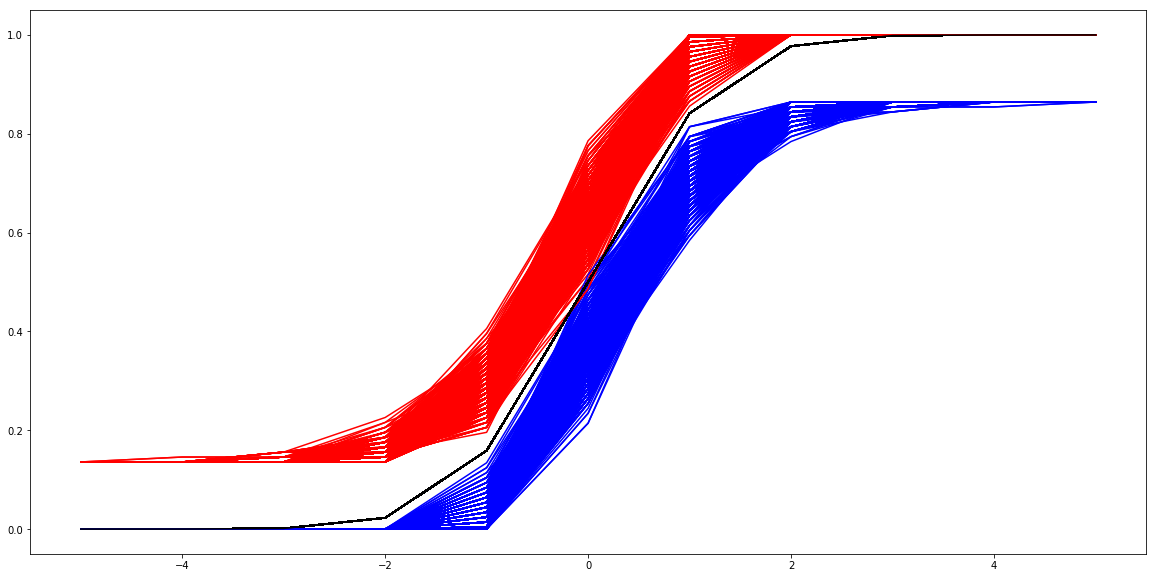

In [15]:
simulate_conf_band(dist='normal', num_sims = 1000)

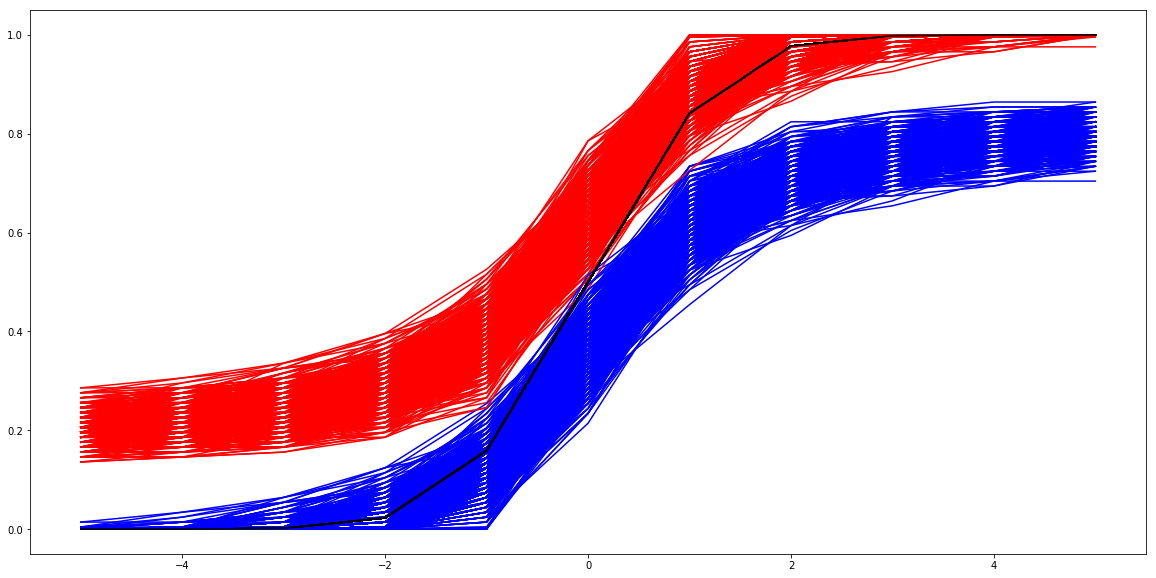

In [16]:
simulate_conf_band(dist='cauchy', num_sims = 1000)

#### 7. Data on the magnitudes of earthquakes near Fiji are available on the course website. Estimate the cdf F(x). Compute and plot a 95 per cent confidence envelope for F . Find an approximate 95 per cent confidence interval for F(4.9)  -  F(4.3)

(Page 127). 

In [28]:
with open('fijiquakes.dat') as file:
    data = file.read()

In [34]:
fiji_df = pd.read_csv(StringIO(data), sep='\s+', index_col=0)
fiji_df.head()

,lat,long,depth,mag,stations
Obs.,,,,,
1,-20.42,181.62,562,4.8,41
2,-20.62,181.03,650,4.2,15
3,-26.00,184.10,42,5.4,43
4,-17.97,181.66,626,4.1,19
5,-20.42,181.96,649,4.0,11


In [35]:
fiji_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 5 columns):
lat         1000 non-null float64
long        1000 non-null float64
depth       1000 non-null int64
mag         1000 non-null float64
stations    1000 non-null int64
dtypes: float64(3), int64(2)
memory usage: 46.9 KB


#### empirical CDF
$\hat{F}_n(x) = \frac{1}{n}\sum_{i=1}^{n}I(X_i \le x)$

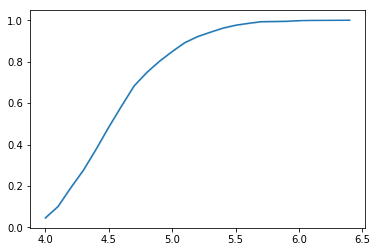

In [39]:
from math import floor, ceil
n = len(fiji_df)

def F_hat_n(x, n=n):
    return np.sum(fiji_df['mag'] <= x) / n

F_hat_n_of_x = []
for x in fiji_df['mag'].values:
    F_hat_n_of_x.append(F_hat_n(x))
    
sns.lineplot(fiji_df['mag'].values, F_hat_n_of_x)

#### non-parametric confidence band for $F(x)$ is given by $(L(x),U(x))$ where
$$ L(x) = \max(\hat{F}_n(x) - \epsilon_n, 0) $$
$$ U(x) = \min(\hat{F}_n(x) + \epsilon_n, 1) $$
$$ \epsilon_n = \sqrt{\frac{1}{2n}\log{\frac{2}{\alpha}}} $$


In [43]:
def compute_conf_band(x, alpha=0.05, n=n):
    epsilon_n = np.sqrt(1/(2*n)*log(2/alpha))
    F_hat_n_of_x = F_hat_n(x)
    L_x = max(F_hat_n_of_x-epsilon_n, 0)
    U_x = min(F_hat_n_of_x+epsilon_n, 1)
    return L_x, U_x

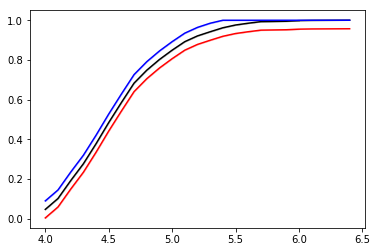

In [44]:
L_x_vals = []
U_x_vals = []
for x in fiji_df['mag'].values:
    L_x, U_x = compute_conf_band(x)
    L_x_vals.append(L_x)
    U_x_vals.append(U_x)
sns.lineplot(fiji_df['mag'].values, F_hat_n_of_x, color='black')
sns.lineplot(fiji_df['mag'].values, L_x_vals, color='red', dashes=True)
sns.lineplot(fiji_df['mag'].values, U_x_vals, color='blue', dashes=True)


In [45]:
F_hat_n(4.9) - F_hat_n(4.3)

0.526

#### 8. Get the data on eruption times and waiting times between eruptions of the old faithful geyser from the course website. Estimate the mean waiting time and give a standard error for the estimate. Also, give a 90 per cent con dence interval for the mean waiting time. Now estimate the median waiting time. In the next chapter we will see how to get the standard error for the median.

(Page 127). 

In [47]:
with open('faithful.dat') as file:
    data = file.read()
    
geyser_df = pd.read_csv(StringIO(data), sep='\s+', skiprows=25)
geyser_df.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [48]:
geyser_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 1 to 272
Data columns (total 2 columns):
eruptions    272 non-null float64
waiting      272 non-null int64
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


In [53]:
# mean waiting time (sample mean)
est_mean_wait_time = np.mean(geyser_df['waiting'])
est_mean_wait_time

70.8970588235294

In [54]:
se_wait_time = np.std(geyser_df['waiting'])
se_wait_time

13.569960017586368

In [55]:
n = len(geyser_df)
n

272

In [57]:
# assuming normality for mean waiting time
alpha = 1-0.9
z_alpha_by_2 = norm.cdf(alpha/2)
conf_int_lo = est_mean_wait_time -  z_alpha_by_2 * se_wait_time
conf_int_hi = est_mean_wait_time +  z_alpha_by_2 * se_wait_time
print('90% confidence interval for mean waiting time {} - {}'.format(conf_int_lo,conf_int_hi))

90% confidence interval for mean waiting time 63.84151001671109 - 77.95260763034773


In [58]:
# median waiting time
est_median_wait_time = np.median(geyser_df['waiting'])
est_median_wait_time

76.0

#### 10. In 1975, an experiment was conducted to see if cloud seeding produced rainfall. 26 clouds were seeded with silver nitrate and 26 were not. The decision to seed or not was made at random. Get the data from http://lib.stat.cmu.edu/DASL/Stories/CloudSeeding.html
#### Let $\theta$ be the difference in the median precipitation from the two groups. Estimate $\theta$. Estimate the standard error of the estimate and produce a 95 per cent confidence interval.

(Page 127). 

In [61]:
cloud_df = pd.read_csv('cloud-seeding.txt', sep='\t')
cloud_df.head()

,Unseeded Clouds,Seeded Clouds
0,1202.6,2745.6
1,830.1,1697.8
2,372.4,1656.0
3,345.5,978.0
4,321.2,703.4


In [62]:
cloud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
Unseeded Clouds    26 non-null float64
Seeded Clouds      26 non-null float64
dtypes: float64(2)
memory usage: 496.0 bytes


In [64]:
theta_hat = np.median(cloud_df['Unseeded Clouds']) - np.median(cloud_df['Seeded Clouds'])
theta_hat

-177.39999999999998

### Chapter 9 - The Bootstrap

#### Example 9.4 For estimating the skewness of the nerve data, here are the various confidence intervals.

(Page 134). 

In [84]:
with open('nerve.dat') as file:
    data = file.read()
    
nerve_df = pd.read_csv(StringIO(data), sep='\s+', header=None)
nerve_df.head()

,0,1,2,3,4,5
0,0.21,0.03,0.05,0.11,0.59,0.06
1,0.18,0.55,0.37,0.09,0.14,0.19
2,0.02,0.14,0.09,0.05,0.15,0.23
3,0.15,0.08,0.24,0.16,0.06,0.11
4,0.15,0.09,0.03,0.21,0.02,0.14


In [85]:
nerve_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 6 columns):
0    134 non-null float64
1    133 non-null float64
2    133 non-null float64
3    133 non-null float64
4    133 non-null float64
5    133 non-null float64
dtypes: float64(6)
memory usage: 6.4 KB


In [86]:
nerve_df.loc[nerve_df.isna().any(axis=1)]

,0,1,2,3,4,5
133,0.51,NaN,NaN,NaN,NaN,NaN


In [87]:
nerve_series = pd.concat([nerve_df[0], nerve_df[1], nerve_df[2], nerve_df[3], nerve_df[4], nerve_df[5] ])
nerve_series = nerve_series.dropna()
nerve_series

0      0.21
1      0.18
2      0.02
3      0.15
4      0.15
5      0.24
6      0.02
7      0.06
8      0.55
9      0.05
10     0.38
11     0.01
12     0.06
13     0.09
14     0.08
15     0.38
16     0.74
17     0.17
18     0.05
19     0.30
20     0.49
21     0.01
22     0.96
23     0.23
24     0.74
25     0.01
26     0.09
27     0.05
28     0.26
29     0.05
       ... 
103    0.52
104    0.14
105    0.51
106    0.08
107    0.26
108    0.08
109    0.05
110    0.01
111    0.51
112    0.01
113    0.14
114    0.37
115    0.40
116    0.01
117    0.68
118    0.13
119    0.03
120    0.06
121    0.31
122    0.27
123    0.02
124    0.24
125    0.01
126    0.10
127    0.52
128    0.44
129    0.02
130    0.06
131    0.03
132    0.10
Length: 799, dtype: float64

In [89]:
def compute_skewness(X):
    n = len(X)
    se_hat = np.std(X)
    X_bar = np.mean(X)
    skewness = np.sum((X-X_bar)**3) / ( n* (se_hat**3) )
    return skewness

# bootstrap
B=1000
theta_hat_b_lst = []
n = len(nerve_series)
for b in range(B):
    X_b = np.random.choice(nerve_series, size=n, replace=True)
    theta_hat_b = compute_skewness(X_b)
    theta_hat_b_lst.append(theta_hat_b)
    
theta_hat_obs = compute_skewness(X=nerve_series)
se_theta_hat = np.std(theta_hat_b_lst)
print('theta_hat_obs and its standard error with bootsrtap {},{}'.format(theta_hat_obs,se_theta_hat))

alpha = 1-0.95
# normal 95% confidence interval
z_alpha_by_2 = norm.ppf(alpha/2)
C_norm_lo = theta_hat_obs + z_alpha_by_2*se_theta_hat
C_norm_hi = theta_hat_obs - z_alpha_by_2*se_theta_hat
print('Normal 95% confidence interval {},{}'.format(C_norm_lo,C_norm_hi))


# pivotal 95% confidence interval
theta_hat_b_alphaby2 = np.percentile(theta_hat_b_lst, 100*alpha/2)
theta_hat_b_1minusalphaby2 = np.percentile(theta_hat_b_lst, 100*(1-alpha/2))
C_pivot_lo = 2*theta_hat_obs - theta_hat_b_1minusalphaby2
C_pivot_hi = 2*theta_hat_obs - theta_hat_b_alphaby2
print('Pivotal 95% confidence interval {},{}'.format(C_pivot_lo,C_pivot_hi))

theta_hat_obs and its standard error with bootsrtap 1.7612485439301875,0.1622408294323019
Normal 95% confidence interval 1.4432623614209699,2.079234726439405
Pivotal 95% confidence interval 1.4605014226182864,2.107725318659868


#### Example 9.5 (The Plasma Cholesterol Data.) Let us return to the cholesterol data. Suppose we are interested in the difference of the medians. 

(Page 135). 

In [95]:
with open('coris.dat') as file:
    data = file.read()
    
pchl_df = pd.read_csv(StringIO(data), skiprows=[1,2,3], header=0, index_col=0)
pchl_df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [96]:
pchl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 463
Data columns (total 10 columns):
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null int64
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5)
memory usage: 39.7 KB


In [97]:
no_chd_df = pchl_df.loc[pchl_df['chd'] == 0]
no_chd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 3 to 462
Data columns (total 10 columns):
sbp          302 non-null int64
tobacco      302 non-null float64
ldl          302 non-null float64
adiposity    302 non-null float64
famhist      302 non-null int64
typea        302 non-null int64
obesity      302 non-null float64
alcohol      302 non-null float64
age          302 non-null int64
chd          302 non-null int64
dtypes: float64(5), int64(5)
memory usage: 26.0 KB


In [98]:
chd_df = pchl_df.loc[pchl_df['chd'] == 1]
chd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 1 to 463
Data columns (total 10 columns):
sbp          160 non-null int64
tobacco      160 non-null float64
ldl          160 non-null float64
adiposity    160 non-null float64
famhist      160 non-null int64
typea        160 non-null int64
obesity      160 non-null float64
alcohol      160 non-null float64
age          160 non-null int64
chd          160 non-null int64
dtypes: float64(5), int64(5)
memory usage: 13.8 KB


In [100]:
no_chd_median = np.median(no_chd_df['ldl'])
n_no_chd = len(no_chd_df)
chd_median = np.median(chd_df['ldl'])
n_chd = len(chd_df)
theta_hat = chd_median - no_chd_median

B=1000
theta_hat_b_lst = []
for b in range(B):
    no_chd_b = np.random.choice(no_chd_df['ldl'], size=n_no_chd, replace=True)
    chd_b = np.random.choice(chd_df['ldl'], size=n_chd, replace=True)
    theta_hat_b_lst.append(np.median(chd_b) - np.median(no_chd_b))

se_theta_hat_b = np.std(theta_hat_b_lst)
print('theta_hat_obs and its standard error with bootsrtap {},{}'.format(theta_hat,se_theta_hat_b))

# 95% confidence intervals
alpha = 1-0.95
# normal
z_alphaby2 = norm.ppf(alpha/2)
C_norm_lo = theta_hat + z_alphaby2*se_theta_hat_b
C_norm_hi = theta_hat - z_alphaby2*se_theta_hat_b
print('Normal 95% confidence interval {},{}'.format(C_norm_lo,C_norm_hi))

# pivotal
theta_hat_alphaby2 = np.percentile(theta_hat_b_lst, 100*alpha/2)
theta_hat_1minusalphaby2 = np.percentile(theta_hat_b_lst, 100*(1-alpha/2))
C_pivot_hi = 2*theta_hat - theta_hat_alphaby2
C_pivot_lo = 2*theta_hat - theta_hat_1minusalphaby2
print('Pivotal 95% confidence interval {},{}'.format(C_pivot_lo,C_pivot_hi))


theta_hat_obs and its standard error with bootsrtap 1.0849999999999995,0.20578817015319412
Normal 95% confidence interval 0.6816625980553386,1.4883374019446605
Pivotal 95% confidence interval 0.669999999999999,1.509999999999999


#### 1. Consider the data in Example 9.6. Find the plug-in estimate of the correlation coefficient. Estimate the standard error using the bootstrap. Find a 95 per cent con dence inerval using all three methods.

(Page 141). 

In [108]:
X = np.array([576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594])
Y = np.array([3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 3.96])
n = len(X)
theta_hat = np.corrcoef(x=X, y=Y)[0,1]
B=1000
theta_hat_b=[]
for b in range(B):
    X_b = np.random.choice(X, size=n, replace=True)
    Y_b = np.random.choice(Y, size=n, replace=True)
    theta_hat_b.append(np.corrcoef(x=X_b, y=Y_b)[0,1])

se_hat = np.std(theta_hat_b)    
print('theta_hat_obs and its standard error with bootsrtap {},{}'.format(theta_hat,se_hat))

#95% conf intervals
alpha = 1-0.95
# normal
z_alphaby2 = norm.ppf(alpha/2)
C_n_lo = theta_hat+z_alphaby2*se_hat
C_n_hi = theta_hat-z_alphaby2*se_hat
print('Normal 95% confidence interval {},{}'.format(C_n_lo,C_n_hi))

# pivotal
theta_alphaby2 = np.percentile(theta_hat_b,100*alpha/2)
theta_1subalphaby2 = np.percentile(theta_hat_b,100*(1-alpha/2))
C_p_lo = 2*theta_hat - theta_1subalphaby2
C_p_hi = 2*theta_hat - theta_alphaby2
print('Pivotal 95% confidence interval {},{}'.format(C_p_lo,C_p_hi))

theta_hat_obs and its standard error with bootsrtap 0.5459189161795885,0.27398909297548024
Normal 95% confidence interval 0.008910161790850912,1.0829276705683262
Pivotal 95% confidence interval 0.545666113562207,1.603638691264917


#### 2. (Computer Experiment.) Conduct a simulation to compare the four bootstrap confidence interval methods. Let $n = 50$ and let $T(F) = \int \frac{(x-\mu)^3dF(x)}{\sigma^3}$ be the skewness. Draw $Y_1,\dots,Y_n \sim N(0, 1)$ and set $X_i = {e}^{Y_i} , i = 1,...,n$. Construct the four types of bootstrap 95 per cent intervals for $T(F)$ from the data $X_1,\dots,X_n$. Repeat this whole thing many times and estimate the true coverage of the four intervals.

(Page 141). 

In [117]:
def compute_skewness(X):
    X_bar = np.mean(X)
    sigma_hat = np.std(X)
    skewness = np.sum((X-X_bar)**3)/sigma_hat**3
    return skewness

def perform_bootstrap(T, X, alpha=0.05):
    B = 1000
    theta_hat_b = []
    theta_hat_obs = T(X)
    for b in range(B):
        X_b = np.random.choice(X, size=n, replace=True)
        theta_hat_b.append(T(X_b))
        
    se_hat = np.std(theta_hat_b)    
    print('theta_hat_obs and its standard error with bootstrap {},{}'.format(theta_hat_obs,se_hat))

    #conf intervals
    # normal
    z_alphaby2 = norm.ppf(alpha/2)
    C_n_lo = theta_hat+z_alphaby2*se_hat
    C_n_hi = theta_hat-z_alphaby2*se_hat
    print('Normal {}% confidence interval {},{}'.format((1-alpha)*100,C_n_lo,C_n_hi))

    # pivotal
    theta_alphaby2 = np.percentile(theta_hat_b,100*alpha/2)
    theta_1subalphaby2 = np.percentile(theta_hat_b,100*(1-alpha/2))
    C_p_lo = 2*theta_hat - theta_1subalphaby2
    C_p_hi = 2*theta_hat - theta_alphaby2
    print('Pivotal {}% confidence interval {},{}'.format((1-alpha)*100,C_p_lo,C_p_hi))
    
    # percentile
    print('Percentile {}% confidence interval {},{}'.format((1-alpha)*100,theta_alphaby2,theta_1subalphaby2))
    
    return 

n=50
for i in range(5):
    Y = np.random.normal(0,1,50)
    X = np.exp(Y)
    perform_bootstrap(compute_skewness, X)
    print('')

theta_hat_obs and its standard error with bootstrap 157.6454161219544,45.13293700746926
Normal 95.0% confidence interval -87.91301213497515,89.00484996733432
Pivotal 95.0% confidence interval -200.93376637006594,-50.17893916670978
Percentile 95.0% confidence interval 51.27077699906896,202.02560420242511

theta_hat_obs and its standard error with bootstrap 170.78506788990813,47.96235481375403
Normal 95.0% confidence interval -93.45856913250962,94.5504069648688
Pivotal 95.0% confidence interval -216.2225733841112,-44.851839135255716
Percentile 95.0% confidence interval 45.94367696761489,217.31441121647038

theta_hat_obs and its standard error with bootstrap 101.56013084936099,22.562218157249305
Normal 95.0% confidence interval -43.675216083364724,44.7670539157239
Pivotal 95.0% confidence interval -149.43513400961047,-59.941809876609256
Percentile 95.0% confidence interval 61.03364770896843,150.52697184196964

theta_hat_obs and its standard error with bootstrap 96.85966633734891,24.346534

#### 3.  Let $X_1,\dots,X_n \sim t_3$ where $n = 25$. Let $\theta = T(F)=(q_{.75} - q_{.25})/1.34$ where $q_p$ denotes the pth quantile. Do a simulation to compare the coverage and length of the following confidence intervals for $\theta$: (i) Normal interval with standard error from the bootstrap, (ii) bootstrap percentile interval. Remark: The jackknife does not give a consistent estimator of the variance of a quantile.

(Page 142). 

In [121]:
def compute_interquantile_range(X):
    q_75 = np.percentile(X,75)
    q_25 = np.percentile(X, 25)
    return (q_75 - q_25)/1.34

n = 25
X = np.random.standard_t(df=3, size=n)
perform_bootstrap(compute_interquantile_range, X)

theta_hat_obs and its standard error with bootstrap 0.7874160121705022,0.3315078071237558
Normal 95.0% confidence interval -0.10382444637682375,1.195662278736001
Pivotal 95.0% confidence interval -0.9214827715865188,0.5950826799128179
Percentile 95.0% confidence interval 0.49675515244635915,2.013320603945696
